# Conjugate Gradient

In mathematics, the conjugate gradient method is an algorithm for the numerical solution of particular systems of linear equations, namely those whose matrix is positive-definite. The conjugate gradient method is often implemented as an iterative algorithm, applicable to sparse systems that are too large to be handled by a direct implementation or other direct methods such as the Cholesky decomposition. Large sparse systems often arise when numerically solving partial differential equations or optimization problems.



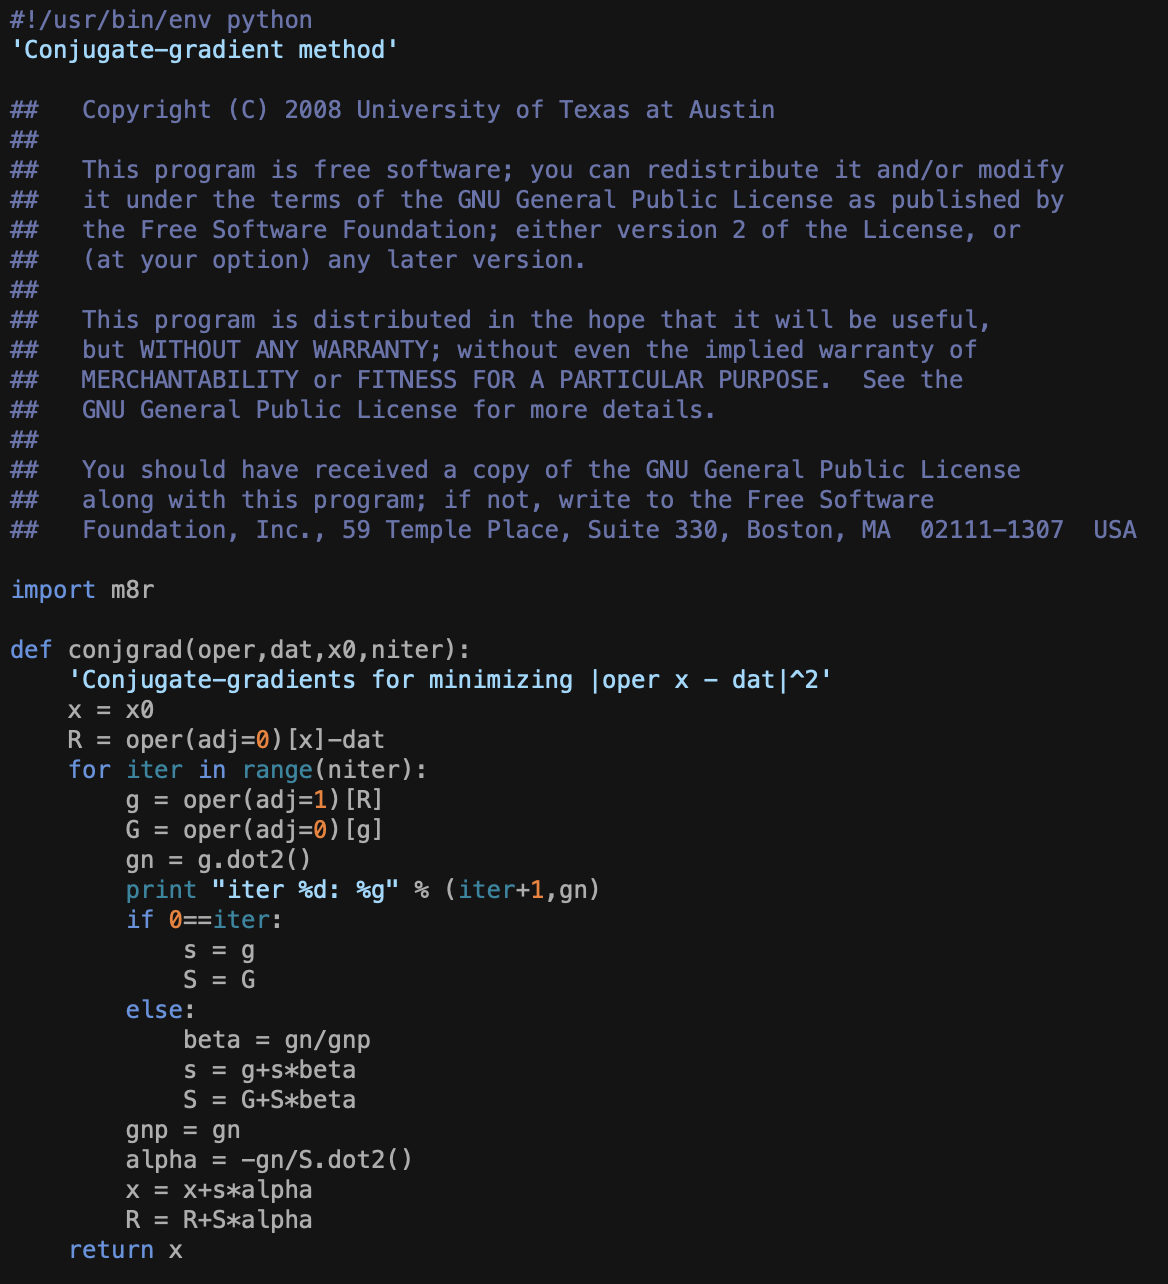

In [90]:
import numpy as np
def cg(oper,par,d,x0,niter=10,verb=0):
    # CG for solving least-squares inverse problems
    # 
    mis=[];
    x=x0;
    R=oper(x,par,1) - d;               #adj=0, forw=1
    for it in range(niter):
        g=oper(R,par,-1);              #adj=1, forw=-1
        G=oper(g,par,1);               #adj=0, forw=1
        gn=np.sum(g*np.conj(g));       #gn = g.dot2()
        if(verb): print("iter %d: %g"%(it+1,gn)); 
        if 0==it:
            s=g;
            S=G;
        else:
            beta=gn/(gnp + 1.e-11);
            s=g+s*beta;
            S=G+S*beta;
        gnp=gn;
        alpha=-gn/(np.sum(S*np.conj(S)) + 1.e-11); #alpha =−gn/S.dot2()
        x=x+s*alpha;
        R=R+S*alpha;
 
    return x

In [91]:
def mat_op(x,par,forw):
    if forw==1:
        y=np.dot(par['M'],x); #or p['M'].dot(x) (y=Mx)
    
    if forw==-1:
        y=np.dot(par['M'].transpose(),x) #or p['M'].transpose().dot(x) (y=M^Tx)

    return y

In [92]:
M=np.random.randn(10,10)
M

array([[-1.22752364e+00,  5.81526395e-01,  3.02074600e+00,
         5.39911174e-01, -1.55529667e+00,  2.23213079e-01,
         1.10553961e+00,  1.23532350e+00,  5.05588885e-01,
         1.33307903e+00],
       [ 2.56423292e+00,  2.85074200e-04, -3.03795133e-01,
         9.17775107e-01, -2.02121475e+00, -3.18244281e-01,
        -7.59002403e-01, -1.08267793e-01,  7.44129418e-01,
        -8.78384395e-01],
       [-5.84633323e-01,  1.56731220e+00, -1.83382179e-01,
        -2.66905050e+00, -3.42828239e-01, -1.60609197e+00,
         1.41195073e+00, -1.90052961e+00,  4.07858793e-01,
         3.05251869e-01],
       [ 2.48745730e-01,  4.66339254e-01, -9.67629096e-01,
         7.10243689e-01,  1.04777127e-01,  1.17664463e+00,
         4.23968799e-01, -4.27338666e-03,  1.71968787e-01,
         4.77243613e-01],
       [ 2.95251220e-01, -1.85452644e+00,  3.06037061e-01,
        -1.36911347e+00, -4.02460724e-01, -1.83498053e-01,
         9.57383359e-01,  1.12895215e+00,  3.35803322e-01,
         1.

In [93]:
x=np.random.randn(10)
x

array([ 1.08477391,  0.64677865,  1.2019108 ,  0.65991279, -0.32134312,
       -0.09353001,  1.0098567 ,  0.85124886, -1.78289495, -0.87523374])

In [94]:
# y=Ax
y=np.dot(M,x)
y

array([ 3.61023822,  2.28502367, -2.52814906, -0.56636679, -1.08319746,
       -2.14776843,  2.89103104,  1.85038226, -0.1952175 ,  0.6210523 ])

In [95]:
x_inv=np.linalg.inv(M).dot(y)
x_inv

array([ 1.08477391,  0.64677865,  1.2019108 ,  0.65991279, -0.32134312,
       -0.09353001,  1.0098567 ,  0.85124886, -1.78289495, -0.87523374])

In [96]:
par={'M':M}
x_cg=cg(mat_op,par,y,np.zeros(x.shape),niter=20);
x_cg

np.linalg.norm(x-x_cg)

2.130230996375655e-08

In [39]:
np.linalg.norm(np.dot(M,x_cg)-y)

507.99171503552213

In [70]:
#First application

import numpy as np
import matplotlib.pyplot as plt

def radon_op(din,param,oper):
    h=param['h']
    v=param['v']
    nt=param['nt']
    dt=param['dt']
    type=param['type']
    
    nh=len(h)
    nv=len(v)
    
    if oper == -1:
        m=np.zeros([nt,nv]);
       
    if oper == 1:
        d=np.zeros([nt,nh]);
    
    if oper == -1:
        d=din;
        
    if oper == 1:
        m=din;
        
    for itau in range(1,nt+1):
        for ih in range(1,nh+1):
            for iv in range(1,nv+1):
                
                if type==1:
                    t = (itau-1)*dt + h[ih-1]/v[iv-1];
                    it = np.floor(t/dt)+1;
                    it=np.int32(it);
                elif type==2:
                    t = (itau-1)*dt + h[ih-1]*h[ih-1]*v[iv-1]/hmax/hmax;   
                    it = np.floor(t/dt)+1;
                    it=np.int32(it);
                elif type==3:
                    t = np.sqrt (((itau-1)*dt)*((itau-1)*dt) + (h[ih-1]/v[iv-1])*(h[ih-1]/v[iv-1]) ) ;
                    it = np.floor(t/dt)+1;
                    it=np.int32(it);
                else:
                    t = np.sqrt (((itau-1)*dt)*((itau-1)*dt) + (h[ih-1]/v[iv-1])*(h[ih-1]/v[iv-1]) ) ;
                    it = np.floor(t/dt)+1;
                    it=np.int32(it);
                    
                if it <= nt and it-1>0:
                    if oper == -1:
                        m[itau-1,iv-1] = m[itau-1,iv-1] + d[it-1,ih-1];
                    if oper == 1:
                        d[it-1,ih-1]  = d[it-1,ih-1] + m[itau-1,iv-1];
    if oper == 1:
        return d;
    if oper == -1:
        return m;
    
def ricker(f,dt,tlength=None):
    # ricker: Ricker wavelet of central frequency f.
    #
    # INPUT:
    # f : central freq. in Hz (f <<1/(2dt) )
    # dt: sampling interval in sec
    # tlength : the duration of wavelet in sec
    #
    # OUTPUT: 
    # w:  the Ricker wavelet
    # tw: time axis
    #
    # Example
    #
    #   [w,tw] = ricker(10,0.004,0.2);
    #   pyplot.plot(tw,w);
    import numpy as np
    
    if tlength!=None:
        nw=np.floor(tlength/dt)+1;
    else:
        nw=2.2/f/dt;
        nw=2*np.floor(nw/2)+1;
    nc=np.floor(nw/2);
    nw=int(nw)
    w =np.zeros(nw);
    
    k=np.arange(1,nw+1,1);
    alpha = (nc-k+1)*f*dt*np.pi;
    beta=np.power(alpha,2);
    w = (1.-beta*2)*np.exp(-beta);
    tw = -(nc+1-k)*dt;
    return w,tw

In [101]:
dp=0.05;dh=0.1;

h=np.linspace(0,6,int(6/dh+1));

nh=len(h);
p=np.linspace(-0.6,0.60,int(1.21/dp)+1);
nnp=len(p);

dt=0.2;nt=501;
m=np.zeros([nt,nnp]);
d=np.zeros([nt,nh]);
w,tw=ricker(0.5,dt);

In [102]:
tau=[100,200,250];
p0=[0,0.1,0.1];

In [103]:
m[tau[0]-1,12]=1;
m[tau[1]-1,18]=0.4;
m[tau[2]-1,18]=0.5;
# t = np.convolve(m[:,1],w,'same');
import scipy.signal
w=np.expand_dims(w,1);
m=scipy.signal.convolve2d(m,w,'same');

par={'h':h,'v':1/(p+0.00000000001),'nt':nt,'dt':dt,'type':1}

#Forward operator
d=radon_op(m,par,1);
#Adjoint operator
ma = radon_op(d,par,-1);

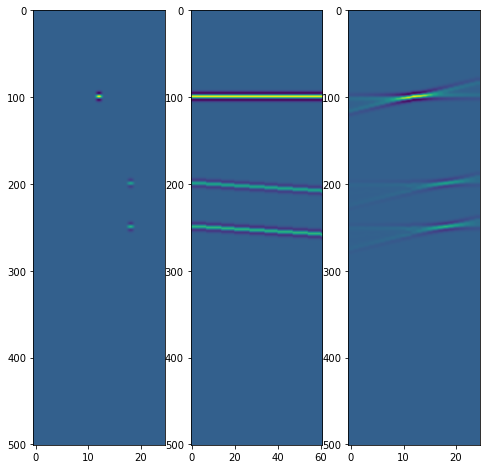

In [104]:
plt.figure(figsize=(8, 8));
plt.subplot(1,3,1)
plt.imshow(m,aspect='auto');
plt.subplot(1,3,2)
plt.imshow(d,aspect='auto');
plt.subplot(1,3,3)
plt.imshow(ma,aspect='auto');
plt.show()

In [ ]:
mi = cg(radon_op,par,d,np.zeros(ma.shape),niter=10,verb=1);

iter 1: 100109
iter 2: 17967.2
iter 3: 3873.82


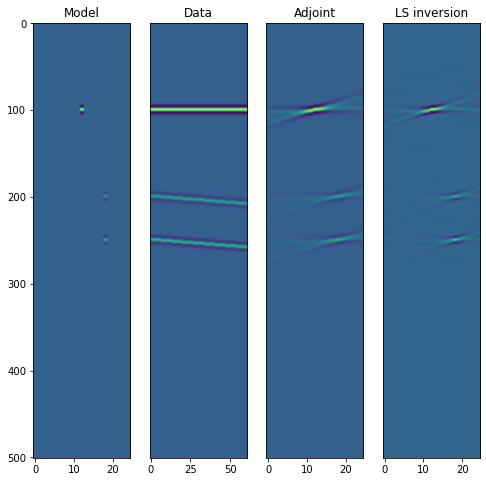

In [76]:
plt.figure(figsize=(8, 8));
plt.subplot(1,4,1)
plt.imshow(m,aspect='auto');plt.title('Model');
plt.subplot(1,4,2)
plt.imshow(d,aspect='auto');plt.title('Data');plt.gca().set_yticks([]);
plt.subplot(1,4,3)
plt.imshow(ma,aspect='auto');plt.title('Adjoint');plt.gca().set_yticks([]);
plt.subplot(1,4,4)
plt.imshow(mi,aspect='auto');plt.title('LS inversion');plt.gca().set_yticks([]);
plt.show()